# Base de données accidents corporels de la circulation
https://www.data.gouv.fr/fr/datasets/base-de-donnees-accidents-corporels-de-la-circulation/

Ce jeu de données provient d'un service public certifié
 NEC MERGITUR
Pour chaque accident corporel (soit un accident survenu sur une voie ouverte à la circulation publique, impliquant au moins un véhicule et ayant fait au moins une victime ayant nécessité des soins), des saisies d’information décrivant l’accident sont effectuées par l’unité des forces de l’ordre (police, gendarmerie, etc.) qui est intervenue sur le lieu de l’accident. Ces saisies sont rassemblées dans une fiche intitulée bulletin d’analyse des accidents corporels. L’ensemble de ces fiches constitue le fichier national des accidents corporels de la circulation dit " Fichier BAAC " administré par l’Observatoire national interministériel de la sécurité routière "ONISR".

Les bases de données, extraites du fichier BAAC, répertorient l'intégralité des accidents corporels de la circulation intervenus durant une année précise en France métropolitaine ainsi que les départements d’Outre-mer (Guadeloupe, Guyane, Martinique, La Réunion et Mayotte depuis 2012) avec une description simplifiée. Cela comprend des informations de localisation de l’accident, telles que renseignées ainsi que des informations concernant les caractéristiques de l’accident et son lieu, les véhicules impliqués et leurs victimes.

Par rapport aux bases de données agrégées 2005-2010 et 2006-2011 actuellement disponibles sur le site www.data.gouv.fr, les bases de données de 2005 à 2016 sont désormais annuelles et composées de 4 fichiers (Caractéristiques – Lieux – Véhicules – Usagers ) au format csv.

Ces bases occultent néanmoins certaines données spécifiques relatives aux usagers et aux véhicules et à leur comportement dans la mesure où la divulgation de ces données porterait atteinte à la protection de la vie privée des personnes physiques aisément identifiables ou ferait apparaître le comportement de telles personnes alors que la divulgation de ce comportement pourrait leur porter préjudice (avis de la CADA – 2 janvier 2012).

# Téléchargement de la documentation
https://www.data.gouv.fr/fr/datasets/r/36496bab-a042-47bf-b08b-3c7467f2bddf

# -1) imports

In [1]:
%matplotlib inline
import seaborn as sns

In [2]:
import pandas as pd

# 0) utilisez pandas pour télécharger les données 

In [3]:
path_vehicule = "https://www.data.gouv.fr/fr/datasets/r/be2191a6-a7cd-446f-a9fc-8d698688eb9e"
vehicules_2016 = pd.read_csv(path_vehicule, encoding="latin1")
vehicules_2016.head()

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh
0,201600000001,0.0,7,0,0.0,0.0,1.0,1.0,B02
1,201600000001,0.0,2,0,0.0,0.0,7.0,15.0,A01
2,201600000002,0.0,7,0,6.0,0.0,1.0,1.0,A01
3,201600000003,0.0,7,0,0.0,1.0,6.0,1.0,A01
4,201600000004,0.0,32,0,0.0,0.0,1.0,1.0,B02


# 1) Renommez les colonnes avec des mots compréhensibles (regarder la doc) 

In [4]:
vehicules_2016.columns = ["Numéro compte", "numéro de senc", "numéro catv", "numéro occutc", "numéro obs","numéro obsm", "numéro choc", "numéro manv", "numéro vehicules"]
#désolé pour les noms j'ai pas eu le temps de regarder la doc.

# 1.1) affichez le nombre de lignes et de colonnes

In [7]:
vehicules_2016.shape

(101924, 9)

# 2) Faites un groupby pour avoir le nombre d'accident par catégorie de véhicule et nombre d'occupants

In [8]:
vehicules_2016[["numéro occutc", "numéro catv", "numéro choc"]].groupby(["numéro catv","numéro occutc"]).count()

numéro choc
numéro catv numéro occutc             
1           0                     4704
2           0                     3423
3           0                      436
7           0                    64633
10          0                     5583
...                                ...
40          140                      1
            150                      2
            200                      1
            210                      1
99          0                      202

[121 rows x 1 columns]

## 2.1) affichez la dataframe hors catégorie de véhicule n° 7

In [9]:
vehicules_2016.loc[vehicules_2016["numéro catv"] != 7]

,Numéro compte,numéro de senc,numéro catv,numéro occutc,numéro obs,numéro obsm,numéro choc,numéro manv,numéro vehicules
1,201600000001,0.0,2,0,0.0,0.0,7.0,15.0,A01
4,201600000004,0.0,32,0,0.0,0.0,1.0,1.0,B02
6,201600000005,0.0,30,0,0.0,2.0,1.0,15.0,B02
9,201600000007,1.0,30,0,0.0,0.0,3.0,15.0,A01
14,201600000009,0.0,30,0,0.0,0.0,2.0,1.0,B02
...,...,...,...,...,...,...,...,...,...
101917,201600059429,2.0,30,0,11.0,0.0,1.0,14.0,A01
101919,201600059430,1.0,30,0,0.0,2.0,1.0,17.0,B01
101920,201600059431,2.0,30,0,0.0,2.0,7.0,15.0,A01
101921,201600059431,1.0,30,0,0.0,2.0,1.0,1.0,B01


## 2.2) faite un pivot table sur les véhicules hors catégorie !7 
index => Catégorie de véhicule  
colonne => nb d'occupant  
valeurs => nb d'accidents  
valeur_par_défaut => 0  

In [23]:
new_df = vehicules_2016.loc[vehicules_2016["numéro catv"] != 7].pivot_table(index = ["numéro catv"], columns = ["numéro occutc"], values=["numéro choc"], fill_value=0)

## 2.3) utilisez la fonction heatmap de seaborn pour lui passer en paramètre votre pivot

<AxesSubplot:xlabel='None-numéro occutc', ylabel='numéro catv'>

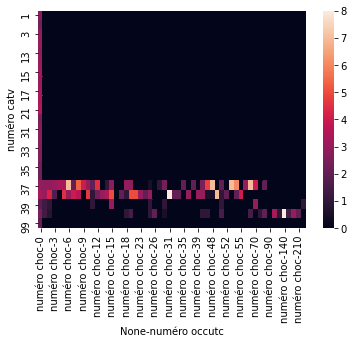

In [24]:
sns.heatmap(new_df)

# 3) transports en communs

In [25]:
cat_transports_en_commun = [37, 38, 39, 40]

## 3.1)  Crééez une colonne "transport_en_commun" qui est un booléen 

In [26]:
import numpy as np
vehicules_2016["transport_en_commun"] = np.where(vehicules_2016["numéro catv"].isin(cat_transports_en_commun), True, False)

## 3.2) créez une dataframe  df_transport_en_commun qui ne contient que les lignes de véhicules de transports en commun

In [27]:
df_transport_en_commun = pd.DataFrame(vehicules_2016.loc[vehicules_2016["transport_en_commun"] ==True ])

## 3.3) affichez les dimensions de cette df :

In [28]:
df_transport_en_commun.shape

(1147, 10)

## 3.4) faite un pivot table : 
index => catégorie de véhicule  
valeurs => moyenne du nombre d'occupants


In [29]:
df_transport_en_commun.pivot_table(index="numéro catv", values="numéro manv")

,numéro manv
numéro catv,
37,5.553596
38,6.358079
39,0.806452
40,1.046667


## 3.5) affichez votre pivot en tant que heatmap

<AxesSubplot:ylabel='numéro catv'>

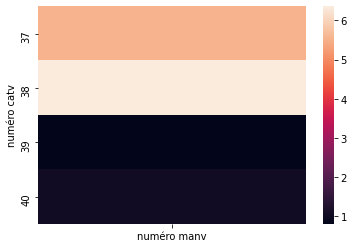

In [30]:
sns.heatmap(df_transport_en_commun.pivot_table(index="numéro catv", values="numéro manv"))

# 4) Mapper les clefs d'un dictionnaire sur leur valeur dans une colonne

In [32]:
info_vehicules = {
1 : "Bicyclette",
2 : "Cyclomoteur <50cm3",
3 : "Voiturette (Quadricycle à moteur carrossé) (anciennement voiturette ou tricycle à moteur)",
4 : "Référence plus utilisée depuis 2006 (scooter immatriculé)",
5 : "Référence plus utilisée depuis 2006 (motocyclette)",
6 : "Référence plus utilisée depuis 2006 (side-car)",
7 : "VL seul",
8 : "Catégorie plus utilisée (VL + caravane)",
9 : "Catégorie plus utilisée (VL + remorque)",
10 : "VU seul 1,5T <= PTAC <= 3,5T avec ou sans remorque (anciennement VU seul 1,5T <= PTAC <= 3,5T)",
11 : "Référence plus utilisée depuis 2006 (VU (10) + caravane)",
12 : "Référence plus utilisée depuis 2006 (VU (10) + remorque)",
13 : "PL seul 3,5T <PTCA <= 7,5T",
14 : "PL seul > 7,5T",
15 : "PL > 3,5T + remorque",
16 : "Tracteur routier seul",
17 : "Tracteur routier + semi-remorque",
18 : "Référence plus utilisée depuis 2006 (transport en commun)",
19 : "Référence plus utilisée depuis 2006 (tramway)",
20 : "Engin spécial",
21 : "Tracteur agricole",
30 : "Scooter < 50 cm3",
31 : "Motocyclette > 50 cm et <= 125 cm",
32 : "Scooter >50cm et<=125cm",
33 : "Motocyclette",
34 : "Scooer",
35 : "Quad",
36 : "Quad lourd > 50 cm (Quadricycle à moteur non carrossé)",
37 : "Autobus",
38 : "Autocar",
39 : "Train",
40 : "Tramway",
99 : "Autre véhicule"}


## 4.1) appliquez la fonction "map" sur la colonne catV, et passez lui en paramètre le dictionnaire info_vehicules

In [33]:
vehicules_2016["info_vehicules"] = vehicules_2016["numéro catv"].map(info_vehicules)

## 4.2) faites de même avec les labels, sur la colonne obstacle_mobile en créant une nouvelle colonne label_obstacle_mobile

In [35]:
labels = {
0 : "inconnu_0",
1 : "Piéton",
2 : "Véhicule",
4 : "Véhicule sur rail",
5 : "Animal domestique 6",
6 : "Animal sauvage",
9 : "Autre",
None : "inconnu"}
vehicules_2016["label_obstacle_mobile"] = vehicules_2016["numéro obsm"].map(labels)

## 4.3) faites un pivot table : nombre d'occupant par label de véhicule
index => label du véhicule  
values => somme du nombre d'occupant  
colonnes => label_obstacle_mobile  

In [ ]:
df_pivot = vehicules_2016.pivot_table(index = "info_vehicules", columns = "label_obstacle_mobile", values = "numéro manv", aggfunc='sum')

## 4.4) faites un heatmap avec ce pivot
title = "Nombre d'accident par type de transport et obstacle"
options du sns.heatmap :  cmap="Reds", square=True, annot=True, fmt="", cbar=True

utilisez : 
props = {"rotation" : 30, "color":"green", "fontweight":"bold"}
plt.setp(ax.get_xticklabels(), **props)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize =(15, 30))
props = {"rotation" : 30, "color":"green", "fontweight":"bold"}

plot = sns.heatmap(df_pivot, 
            cmap="Reds",
            square=True,
            annot=True,
            fmt="",
            cbar=True)


plt.setp(plot.get_xticklabels(), **props)
plt.title("Nombre d'accident par type de transport et obstacle")